## **Support Vector Machines (SVM)**
* Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

* The main idea of SVM is to find a hyperplane that best divides a dataset into classes.

* Effective in high dimensional feature spaces.

* SVMs are different from other classification algorithms because of the way they choose the decision boundary that maximizes the distance from the nearest data points of all the classes.

<center>
    <img src="../assets/svm.png" width=500/>
</center>

### **Core Concepts of SVMs**

* **Hyperplane**
    * A hyperplane is a decision boundary that separates different classes in the feature space.
    * In SVM, the goal is to find the hyperplane that maximizes the margin between the two classes.
    * In a 2-dimensional space (a plane), a hyperplane is a line that divides the feature space into two parts.
    * In a 3-dimensional space, a hyperplane is a plane that divides the feature space into two parts.

* **Support Vectors**
    * Support vectors are the data points that are closest to the hyperplane. 
    * These points are crucial as they define the position and orientation of the hyperplane.

* **Margin**
    * The margin is the distance between the hyperplane and the nearest data point from either class. 
    * A good SVM model has the largest possible margin between the support vectors and the hyperplane.That is why SVMs are called **LARGE MARGIN CLASSIFIER**.

* **Kernel Functions**
    * Kernels are functions that map the original features into a higher-dimensional features space.
    * Kernels maps original features into a higher-dimensional features space so that they can become separable by a linear hyperplane. 
    * The goal is to find a linear decision boundary in this higher-dimensional space that translates to a non-linear boundary in the original space.
    * Different types of kernels:
        * Linear Kernel
            * Used when the data is already linearly separable in the original space.
        * Polynomial Kernel
            * Allows learning of non-linear models. The parameters c and d determine the complexity of the decision boundary.
        * Radial Basis Function (RBF) Kernel
            * Commonly used for its ability to handle highly non-linear data. The parameter γ defines the influence of a single training example.
        * Sigmoid Kernel
            * The parameters α and c need to be carefully tuned.


### **Cost Function**

* Hinge loss is a loss function used primarily for training support vector machines (SVMs). 

* It is designed to penalize misclassified points and those that are correctly classified but still close to the decision boundary.

$$J\ (\theta) = C \sum_{i=1}^{m} \left[ y^{(i)} \text{cost}_1 (\theta^T x^{(i)}) + (1 - y^{(i)}) \text{cost}_0 (\theta^T x^{(i)}) \right] + \frac{\lambda}{2} \sum_{j=1}^{n} \theta_j^2 $$

* $where,$

    1. For the positive class (y = 1), the hinge loss is calculated as:
    $$cost_1 (\theta^T x^{(i)}) = max(0, 1 - \theta^T x^{(i)})$$

    * This measures how much the predicted value $\theta^T x^{(i)}$ deviates from the desired margin for positive class instances. If the prediction is on the correct side of the margin (greater than or equal to 1), the loss is zero. Otherwise, the loss increases linearly as the prediction moves further away from the margin.

    2. For the negative class (y = 0), the hinge loss is calculated as:
    $$cost_0 (\theta^T x^{(i)}) = max(0, 1 + \theta^T x^{(i)})$$

    * This measures how much the predicted value $\theta^T x^{(i)}$ deviates from the desired margin for negative class instances. If the prediction is on the correct side of the margin (less than or equal to -1), the loss is zero. Otherwise, the loss increases linearly as the prediction moves further away from the margin.


* Cost function visualization with $cost_1 (\theta^T x^{(i)})$ on the left and $cost_0 (\theta^T x^{(i)})$ on the right.
<center>
    <img src="../assets/svm-loss.png" />
</center>

* $C$ in the cost function is the regularization parameter that balances the trade-off between the margin size and the classification error.

* High $C$ Value:
    * When $C$ is large, the model places more emphasis on minimizing the classification error.This means the SVM will try to classify all training examples correctly, even if it results in a smaller margin.
    * A high $C$ value can lead to overfitting, where the model fits the training data very well but may not generalize well to new data.

* Low $C$ Value:
    * When $C$ is small, the model allows more misclassifications or margin violations.This means the SVM will focus more on maximizing the margin, even if some training examples are misclassified.
    * A low $C$ value can lead to underfitting, where the model may not capture the complexity of the data well.

* The behaviour of $C$ is inverse to the behaviour of $\lambda$.


### **Linear SVM Example**

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import svm

In [54]:
# linear dummy data
x1 = np.array([1, 5, 1.5, 8, 1, 9, 7, 8.7, 2.3, 5.5, 7.7, 6.1])
x2 = np.array([2, 8, 1.8, 8, 0.6, 11, 10, 9.4, 4, 3, 8.8, 7.5])

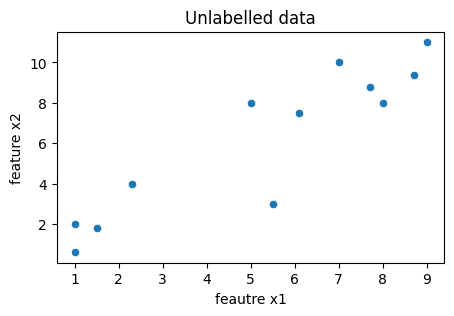

In [55]:
# visualize unlabelled data
plt.figure(figsize=(5, 3))
sns.scatterplot(x=x1, y=x2)
plt.xlabel('feautre x1')
plt.ylabel('feature x2')
plt.title('Unlabelled data')
plt.show()

In [56]:
# creating feature matrix by stacking x1 and x2
X = np.vstack((x1, x2)).T

# Creating dummy ground truth labels
y = [0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1]

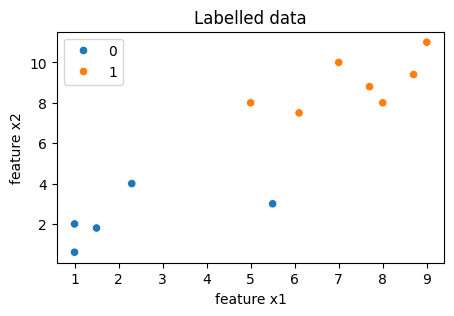

In [57]:
# Visualizing classified data
plt.figure(figsize=(5, 3))
sns.scatterplot(x=x1, y=x2, hue=y)
plt.xlabel('feature x1')
plt.ylabel('feature x2')
plt.title('Labelled data')
plt.show()

In [58]:
# Define the model
# Data are linearly separable so choosing linear kernel
svm_classifier = svm.SVC(kernel='linear', C=1.0)

In [59]:
# Train the model
svm_classifier.fit(X, y)

SVC(kernel='linear')

In [60]:
def plot_linear_decision_boundary(model):
    # get the weight values for the linear equation from the trained SVM model
    w = svm_classifier.coef_[0]

    # get the y-offset for the linear equation
    a = -w[0] / w[1]

    # make the x-axis space for the data points
    XX = np.linspace(0, 13)

    # get the y-values to plot the decision boundary
    yy = a * XX - svm_classifier.intercept_[0] / w[1]

    # plot the decision boundary
    plt.figure(figsize=(5, 3))
    sns.lineplot(x=XX, y=yy)

    # show the plot visually
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
    plt.legend()
    plt.show()

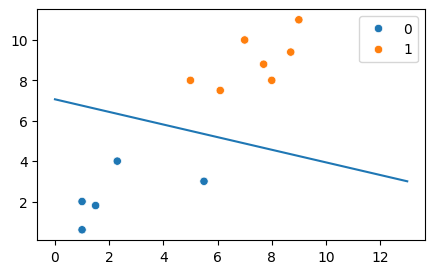

In [61]:
plot_linear_decision_boundary(svm_classifier)

### **Non-Linear SVM**

In [62]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import svm

We will create our dummy non-linear dataset using sklearn datasets.

In [63]:
# Creating circle shaped non-linear data
circle_X, circle_y = datasets.make_circles(n_samples=300, noise=0.05)

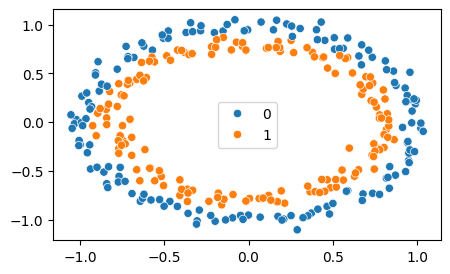

In [64]:
# Visualize non linear data
plt.figure(figsize=(5, 3))
sns.scatterplot(x=circle_X[:, 0], y=circle_X[:, 1], hue=circle_y)
plt.show()

In [65]:
# Instantiate the svm model with non linear kernel
svm_classifier = svm.SVC(kernel='rbf', C=1.0)

In [66]:
# Train the model
svm_classifier.fit(circle_X, circle_y)

SVC()

In [67]:
# Plot the decision boundary for a non-linear SVM problem
def plot_decision_boundary(model, ax=None):
    if ax is None:
        ax = plt.gca()
        
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)

	# shape data
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    
	# get the decision boundary based on the model
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary
    ax.contour(X, Y, P,
               levels=[0], alpha=0.5,
               linestyles=['-'])

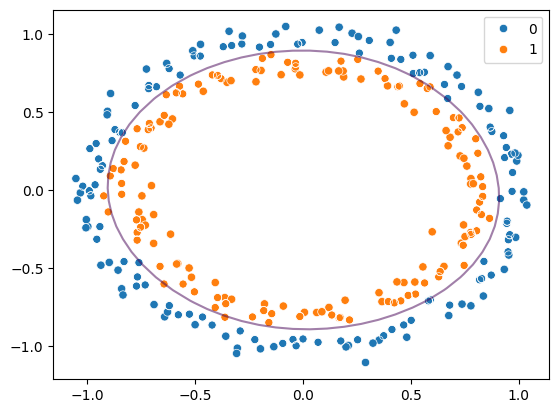

In [68]:
# Visualize data and decision boundary
sns.scatterplot(x=circle_X[:, 0], y=circle_X[:, 1], hue=circle_y)
plot_decision_boundary(svm_classifier)
sns.scatterplot(x=svm_classifier.support_vectors_[:, 0], y=svm_classifier.support_vectors_[:, 1], facecolors='none')
plt.show()

### **Applications of SVM**

<center>    
    <img src="../assets/svm-application.png" width=800 />
</center>